<a href="https://colab.research.google.com/github/sandeepkrishna123/Portfolio/blob/main/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0
1985,1526,-0.854343,1.382948,1.278665,2.914727,-0.183139,-0.349329,0.274566,0.435277,-1.576521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,...,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000
mean,15492.416374,-0.244326,0.242420,0.745774,0.277011,-0.163264,0.092881,-0.145279,0.022237,0.636382,...,-0.047949,-0.146461,-0.038093,0.010678,0.122924,0.033127,0.014454,0.007312,70.271100,0.004272
std,10512.066686,1.889986,1.527342,1.767726,1.466218,1.430821,1.331029,1.338260,1.346813,1.278839,...,0.828385,0.637567,0.520683,0.591180,0.437675,0.530315,0.393002,0.244372,205.363789,0.065222
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.728650,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,4536.250000,-0.959632,-0.329008,0.309235,-0.636713,-0.745156,-0.657306,-0.599403,-0.171779,-0.209565,...,-0.259497,-0.563992,-0.174213,-0.333314,-0.138325,-0.341917,-0.069146,-0.010879,5.750000,0.000000
50%,14796.000000,-0.302521,0.220079,0.898672,0.224608,-0.199377,-0.175434,-0.072254,0.023822,0.620176,...,-0.115398,-0.118803,-0.046994,0.061181,0.160495,-0.036546,0.003868,0.019083,16.000000,0.000000
75%,26220.500000,1.164473,0.870117,1.532922,1.142143,0.341367,0.486735,0.448572,0.279960,1.409142,...,0.049521,0.254057,0.073666,0.398549,0.400713,0.332729,0.096281,0.077551,59.980000,0.000000
max,30633.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


<Axes: xlabel='Time', ylabel='count'>

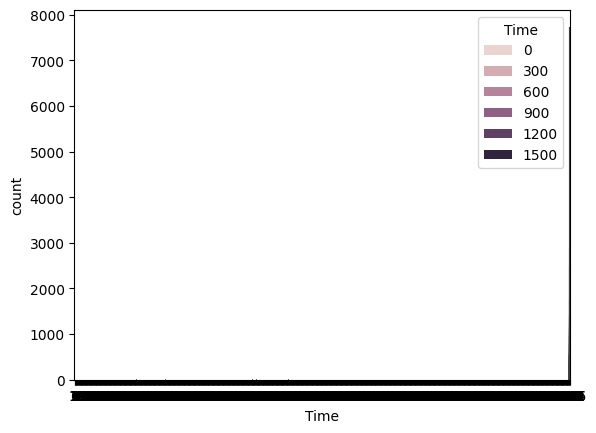

In [8]:
sns.countplot(x='Time',data=df)
sns.barplot(x='Class',y='Amount',hue='Time',data=df)

<Axes: xlabel='Class', ylabel='Amount'>

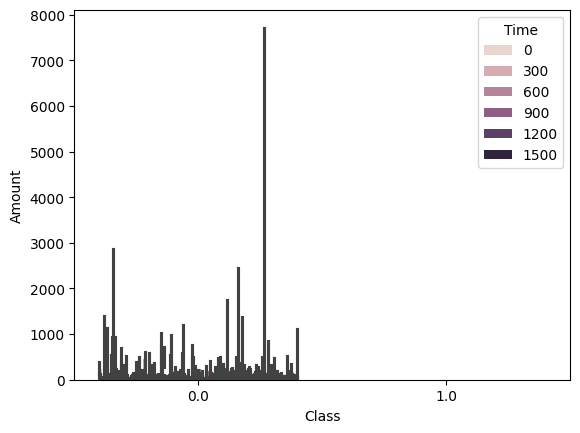

In [9]:
sns.barplot(x='Class',y='Amount',hue='Time',data=df)

<Axes: xlabel='Class', ylabel='count'>

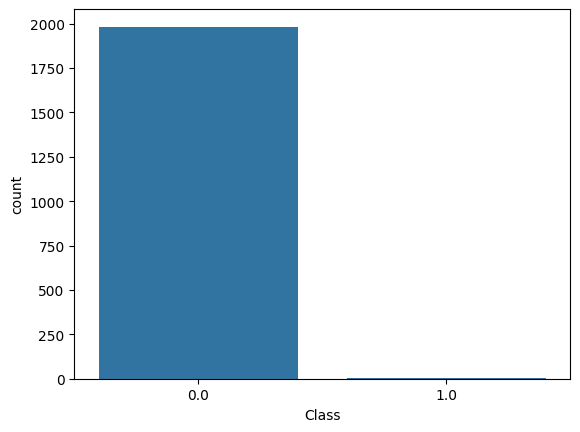

In [12]:
df['Class'].value_counts()
sns.countplot(x='Class',data=df)

In [21]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res,y_res=ros.fit_resample(X,Y)

In [29]:
X.shape

(1986, 30)

In [30]:
x_res.shape

(3968, 30)

In [18]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.fillna(0,inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_res, y_res, test_size= 0.3, random_state=0)

In [40]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641,random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [41]:
y_pred=classifier.predict(x_test)

In [42]:
n_errors=(y_pred!=y_test).sum()

0